# Team - NovaX # Model-X compettion


## 1. Data Loading and Filtering

To handle the large data set, here will not load the entire file into memory. Instead,try to use pandas to read only the specific non-medical columns that we want and will also simultaneously instruct pandas to recognize the special codes (-4, 8, 9)from the Data Dictionary as missing values(NaN) in nessasary columns
"

In [1]:
# main importings 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
columns_needed = [
    # Target
    'DEMENTED',
    
    # (A) A1: Demographics
    'NACCAGE', 'SEX', 'NACCNIHR', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED',

    # (B) b1: Physical & A5: Lifestyle do the person usually do have these
    'HEIGHT', 'WEIGHT','VISION', 'VISCORR', 'HEARING', 'HEARAID','TOBAC30', 'TOBAC100', 'SMOKYRS', 'PACKSPER',
    'ALCOCCAS', 'ALCFREQ', 'ALCOHOL','ABUSOTHR','APNEA', 'RBD', 'INSOMN', 'OTHSLEEP',
    
    # (C) A5: Health History do the person has this in past
    'CVHATT',      # Heart attack
    'CVAFIB',      # Atrial fibrillation
    'CBSTROKE',    # Stroke
    'CBTIA',       # Mini-stroke
    'PD',          # Parkinson's
    'SEIZURES',
    'NACCTBI',     # Traumatic Brain Injury
    'DIABETES',
    'HYPERTEN',
    'HYPERCHO',    # High cholesterol
    'B12DEF','THYROID','ARTHRIT',
    
    # (D) A5: Psychiatric History - person suffer from these
    'PTSD', 'BIPOLAR', 'SCHIZ', 'DEP2YRS', 'DEPOTHR', 'ANXIETY', 'OCD', 'NPSYDEV',

    # (E) A3: Family History -  what family members had
    'NACCFAM', 'NACCMOM', 'NACCDAD',
    
    # (F) A4: Medication
    'ANYMEDS', 'NACCAMD' # Total number of meds
]

## 2.Data cleaning and Preprocessing
#### filter the data and add NAN values to clean


In [3]:
file_path = 'Dementia Prediction Dataset.csv'

try:
    df = pd.read_csv(file_path, usecols=columns_needed)
    print("Data Loaded Successfully!")

    general_codes = [-4, 8, 9, 99]
    columns_to_clean_general = [
        'SEX', 'NACCNIHR', 'PRIMLANG', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED',
        'VISION', 'VISCORR', 'HEARING', 'HEARAID', 'TOBAC30', 'TOBAC100', 'ALCOCCAS', 'ALCFREQ', 
        'ALCOHOL', 'ABUSOTHR', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP',
        'CVHATT', 'CVAFIB', 'CBSTROKE', 'CBTIA', 'PD', 'SEIZURES', 'NACCTBI', 
        'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID', 'ARTHRIT',
        'PTSD', 'BIPOLAR', 'SCHIZ', 'DEP2YRS', 'DEPOTHR', 'ANXIETY', 'OCD', 'NPSYDEV',
        'NACCFAM', 'NACCMOM', 'NACCDAD', 'ANYMEDS'
    ]
    for col in columns_to_clean_general:
        if col in df.columns:
            df[col] = df[col].replace(general_codes, np.nan)

    # must treat these carefully to avoid deleting good data.    
    # 'EDUC': 9 is valid, but -4 and 99 are missing. so we will ensure about it more
    if 'EDUC' in df.columns:
        df['EDUC'] = df['EDUC'].replace([-4, 99], np.nan)
        
    # 'SMOKYRS': 9 is valid, but -4, 88, and 99 are missing.
    if 'SMOKYRS' in df.columns:
        df['SMOKYRS'] = df['SMOKYRS'].replace([-4, 88, 99], np.nan)
        
    # 'PACKSPER': 4 is valid, but -4, 8, and 9 are missing.
    if 'PACKSPER' in df.columns:
        df['PACKSPER'] = df['PACKSPER'].replace([-4, 8, 9], np.nan)
        
    # 'HEIGHT', 'WEIGHT', 'NACCAMD': 8, 9, 99 are "Unknown"
    # These are numerical, but 8 or 9 are not valid measures.
    if 'HEIGHT' in df.columns:
        df['HEIGHT'] = df['HEIGHT'].replace([-4, 8, 9, 99], np.nan)
    if 'WEIGHT' in df.columns:
        df['WEIGHT'] = df['WEIGHT'].replace([-4, 8, 9, 99], np.nan)
    if 'NACCAMD' in df.columns:
        df['NACCAMD'] = df['NACCAMD'].replace([-4, 8, 9, 99], np.nan)

    # 'NACCAGE' is assumed to be clean (no special codes there)

    #get teh summery
    df.info()
 
except FileNotFoundError:
    print(f"File not found.")
except ValueError as e:
    print(f" A problem occurred with the columns. {e}")


Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195196 entries, 0 to 195195
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       195196 non-null  int64  
 1   PRIMLANG  192164 non-null  float64
 2   EDUC      194222 non-null  float64
 3   MARISTAT  194300 non-null  float64
 4   NACCLIVS  194872 non-null  float64
 5   INDEPEND  194599 non-null  float64
 6   RESIDENC  192318 non-null  float64
 7   HANDED    194164 non-null  float64
 8   NACCFAM   177430 non-null  float64
 9   NACCMOM   189004 non-null  float64
 10  NACCDAD   186937 non-null  float64
 11  ANYMEDS   192457 non-null  float64
 12  TOBAC30   123036 non-null  float64
 13  TOBAC100  122272 non-null  float64
 14  SMOKYRS   119634 non-null  float64
 15  PACKSPER  119730 non-null  float64
 16  ALCOCCAS  19326 non-null   float64
 17  ALCFREQ   12241 non-null   float64
 18  CVHATT    123136 non-null  float64
 19  CVAFIB    122935 n

## 3.Get the special data rows that we want to train the model B

In [4]:
# --- Model B Strategy: Filter for specialist data rows ---

# setting the threshold to 30,000
min_data_threshold = 30000

# 1. Find the 'specialist' columns (the ones with < 30,000 data)
specialist_columns = df.columns[df.count() < min_data_threshold]

# 2. Get the rows where at least one of these specialist columns is not null
# .dropna(subset=..., how = 'all') drops rows where ALL specialist columns are NaN.
original_rows = df.shape[0]
df_model_B = df.dropna(subset=specialist_columns, how='all').copy()

print(f"Original dataset had {original_rows} rows.")
print(f"Filtered dataset has {df_model_B.shape[0]} rows.")
print(f"Dropped {original_rows - df_model_B.shape[0]} rows that lacked specialist data.")

df = df_model_B  # Now df contains only the rows for Model B training
df.info()

Original dataset had 195196 rows.
Filtered dataset has 19604 rows.
Dropped 175592 rows that lacked specialist data.


<class 'pandas.core.frame.DataFrame'>
Index: 19604 entries, 0 to 195195
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       19604 non-null  int64  
 1   PRIMLANG  19254 non-null  float64
 2   EDUC      19458 non-null  float64
 3   MARISTAT  19460 non-null  float64
 4   NACCLIVS  19492 non-null  float64
 5   INDEPEND  19392 non-null  float64
 6   RESIDENC  19455 non-null  float64
 7   HANDED    19364 non-null  float64
 8   NACCFAM   16534 non-null  float64
 9   NACCMOM   19360 non-null  float64
 10  NACCDAD   19360 non-null  float64
 11  ANYMEDS   19347 non-null  float64
 12  TOBAC30   19474 non-null  float64
 13  TOBAC100  19257 non-null  float64
 14  SMOKYRS   18865 non-null  float64
 15  PACKSPER  18965 non-null  float64
 16  ALCOCCAS  19326 non-null  float64
 17  ALCFREQ   12241 non-null  float64
 18  CVHATT    19526 non-null  float64
 19  CVAFIB    19449 non-null  float64
 20  CBSTROKE  19510 non-null  float6

#### remove duplicates if any exist

In [5]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(4)

In [6]:
# there are duplicates
df_base_model=df.drop_duplicates()
df_base_model.shape

(19600, 55)

##### Impute Missing Tobacco Data

As we discussed, we cannot blindly fill all NaNs in SMOKYRS (Years Smoked) with 0. There are two types of NaNs:

Logical NaNs: TOBAC100 = 0 (No), so SMOKYRS is skipped. These should be 0.

True Missing NaNs: TOBAC100 = 1 (Yes), but the person forgot to answer SMOKYRS. These should not be 0.

we will only fill the "Logical NaNs" (Case 1). The "True Missing NaNs" (Case 2) will be handled later in our general imputation step (use with the median or most appropriate value).

In [7]:
# We assume if it's missing, they are likely a non-smoker (0).
if 'TOBAC100' in df.columns:
    df['TOBAC100'] = df['TOBAC100'].fillna(0)

In [8]:
# Now, apply the conditional logic
# Condition:- Where TOBAC100 is 0 as NO
condition_non_smoker = (df['TOBAC100'] == 0)
tobacco_cols_to_fill = ['SMOKYRS', 'PACKSPER', 'TOBAC30']

for col in tobacco_cols_to_fill:
    if col in df.columns:
        # We fill NaNs with 0 ONLY for the rows that meet the condition
        df.loc[condition_non_smoker, col] = df.loc[condition_non_smoker, col].fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19604 entries, 0 to 195195
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       19604 non-null  int64  
 1   PRIMLANG  19254 non-null  float64
 2   EDUC      19458 non-null  float64
 3   MARISTAT  19460 non-null  float64
 4   NACCLIVS  19492 non-null  float64
 5   INDEPEND  19392 non-null  float64
 6   RESIDENC  19455 non-null  float64
 7   HANDED    19364 non-null  float64
 8   NACCFAM   16534 non-null  float64
 9   NACCMOM   19360 non-null  float64
 10  NACCDAD   19360 non-null  float64
 11  ANYMEDS   19347 non-null  float64
 12  TOBAC30   19597 non-null  float64
 13  TOBAC100  19604 non-null  float64
 14  SMOKYRS   19212 non-null  float64
 15  PACKSPER  19312 non-null  float64
 16  ALCOCCAS  19326 non-null  float64
 17  ALCFREQ   12241 non-null  float64
 18  CVHATT    19526 non-null  float64
 19  CVAFIB    19449 non-null  float64
 20  CBSTROKE  19510 non-null  float6

In [10]:
df.isnull().sum()

SEX            0
PRIMLANG     350
EDUC         146
MARISTAT     144
NACCLIVS     112
INDEPEND     212
RESIDENC     149
HANDED       240
NACCFAM     3070
NACCMOM      244
NACCDAD      244
ANYMEDS      257
TOBAC30        7
TOBAC100       0
SMOKYRS      392
PACKSPER     292
ALCOCCAS     278
ALCFREQ     7363
CVHATT        78
CVAFIB       155
CBSTROKE      94
CBTIA        213
PD            95
SEIZURES     131
NACCTBI      229
DIABETES      83
HYPERTEN      89
HYPERCHO     204
B12DEF       723
THYROID      265
ARTHRIT      200
APNEA        738
RBD          536
INSOMN       176
OTHSLEEP     264
ALCOHOL      137
ABUSOTHR     128
PTSD         193
BIPOLAR      114
SCHIZ         95
DEP2YRS      329
DEPOTHR      600
ANXIETY      184
OCD          186
NPSYDEV      244
HEIGHT       718
WEIGHT       736
VISION       846
VISCORR      833
HEARING      735
HEARAID      697
DEMENTED       0
NACCNIHR     449
NACCAGE        0
NACCAMD     2929
dtype: int64

#### use Feature engineering technique to shortage the columns furthermrore
use BMI instead of height,weight

We will:
- Calculate BMI using the formula: BMI = Weight (kg) / Height (m)^2
- Convert our units (inches to meters, lbs to kg).
- Create the new BMI column.Drop the original HEIGHT and WEIGHT columns to simplify our dataset

In [11]:
height = df['HEIGHT']* 0.0254  # 1 inch = 0.0254 m
weight = df['WEIGHT']* 0.453592 # 1 lb = 0.453592 kg

df['BMI'] = weight/(height**2)
df['BMI'] = df['BMI'].replace([np.inf,-np.inf],np.nan)

In [12]:
df['BMI']

0         32.357074
2         23.734004
3         79.174438
4         18.970383
5         22.142511
            ...    
195150    24.799612
195158    21.613616
195175    21.521190
195186    14.354825
195195    26.660474
Name: BMI, Length: 19604, dtype: float64

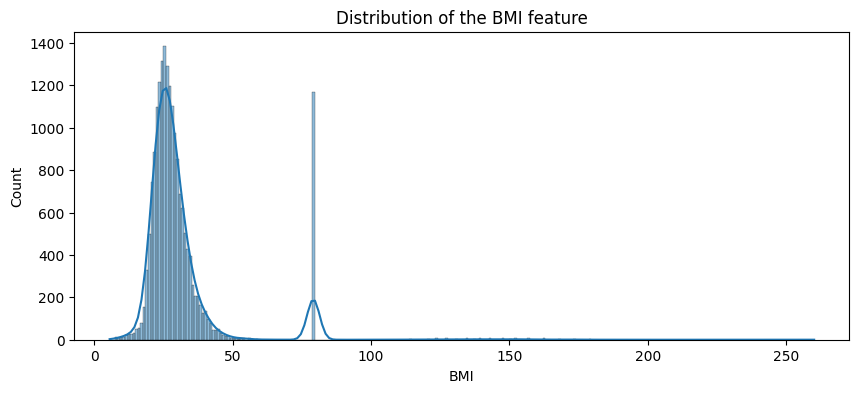

In [13]:
# look at the distribution of the BMI feature
plt.figure(figsize=(10,4))
sns.histplot(df['BMI'].dropna(),kde=True)
plt.title('Distribution of the BMI feature')
plt.show()

We will:

- Plot a boxplot of the original (dirty) BMI data to visually confirm the data entry errors.

- Define a plausible BMI range (15 to 55) and set all values outside it to NaN.

- Plot a second boxplot of the cleaned BMI data to confirm the outliers were successfully removed.

<Axes: xlabel='BMI'>

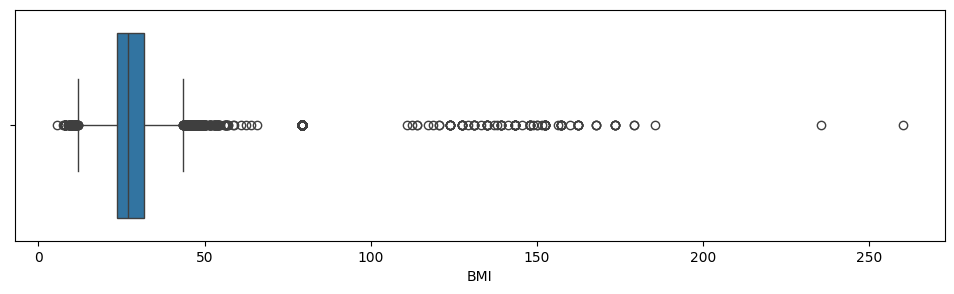

In [14]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['BMI'])
# before cleaning

In [15]:
# define our plasusible BMI range to 15 - 55 and will clean others
min_bmi = 15
max_bmi = 55


df.loc[(df['BMI']<min_bmi) | (df['BMI']>max_bmi), 'BMI'] = np.nan

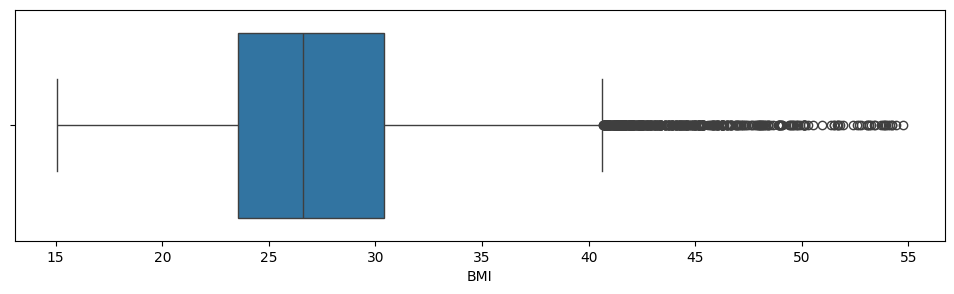

In [16]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['BMI'].dropna())
plt.show()

boxplots for each of our main numerical features to quickly check their quality

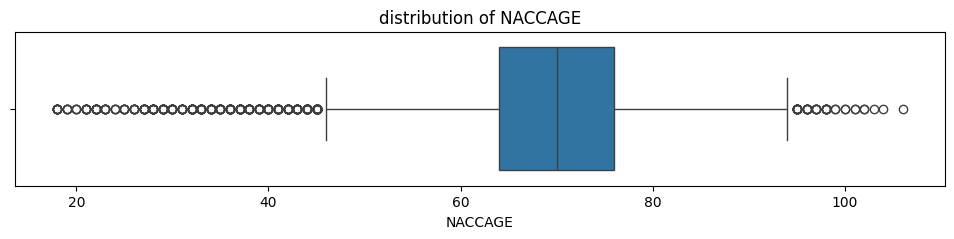

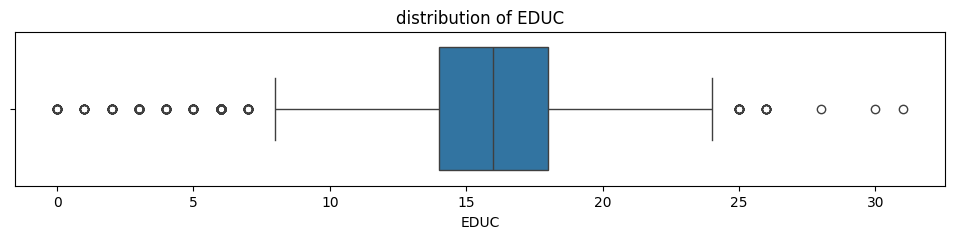

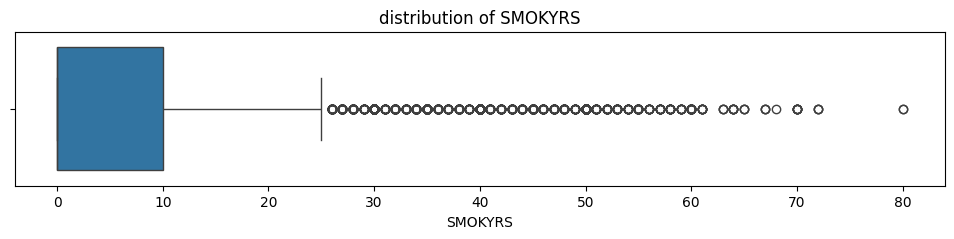

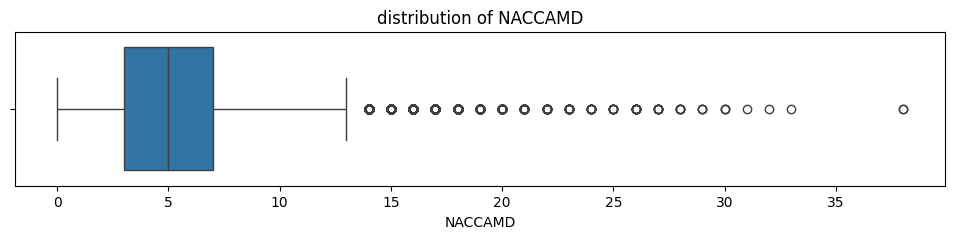

In [17]:
numerical_features_to_check = ['NACCAGE', 'EDUC', 'SMOKYRS', 'NACCAMD']

for col in numerical_features_to_check:
    if col in df.columns:
        plt.figure(figsize=(12,2))
        sns.boxplot(x=df[col].dropna())
        plt.title(f'distribution of {col}')
        plt.xlabel(col)
        plt.show()

lets find is they any not valid in numerical

In [18]:
# allowablew range 18-120 in there
count_outliers1 = df['NACCAGE'][df['NACCAGE']>120].count()
# df.loc[df['NACCAGE']>100, 'NACCAGE'] = np.nan 
count_outliers1

np.int64(0)

In [19]:
count_outliers2 = df['EDUC'][df['EDUC']>36].count()
count_outliers2

np.int64(0)

In [20]:

df['PACKSPER'] = df['PACKSPER'].replace([-4, 8, 9], np.nan)
    
#logical errors (any value > 5)
count_outliers = df['PACKSPER'][df['PACKSPER'] > 5].count()
count_outliers

np.int64(0)

now we look at the target varible - DEMENTED to find impbalancing

In [21]:
df['DEMENTED']

0         0
2         0
3         1
4         0
5         0
         ..
195150    0
195158    0
195175    0
195186    0
195195    0
Name: DEMENTED, Length: 19604, dtype: int64

In [22]:
target_counts = df['DEMENTED'].value_counts()
target_counts

DEMENTED
0    14781
1     4823
Name: count, dtype: int64

In [23]:
df['DEMENTED'].value_counts(normalize=True) * 100

DEMENTED
0    75.397878
1    24.602122
Name: proportion, dtype: float64

can be seen some unbalanced here

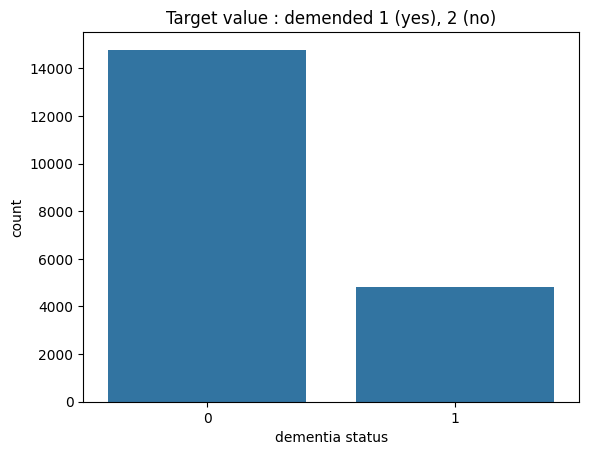

In [24]:
sns.countplot(x='DEMENTED', data = df_base_model)
plt.title('Target value : demended 1 (yes), 2 (no)')
plt.ylabel('count')
plt.xlabel('dementia status')
plt.xticks([0,1])
plt.show()

The 70/30 split is "moderately imbalanced". If we train on it, the model will be biased.so we will do Oversampling teqnique like SMOTE is to perfect solution to get to 50/50.But, before it follow one very important thing to prevent data leakage:First, we must clean all NaN values and then we will split our data into a train set and a test set.after will apply SMOTE only to the train set.


#### next fill numerical NaNs(like BMI, EDUC) with their column's Median value  or use KNN method. Fill categorical NaNs (like MARISTAT, DIABETES) with their column's Mode

In [25]:
df_simple_imputed = df.copy()

In [26]:
# true_numerical = ['NACCAGE','EDUC','SMOKYRS']

In [27]:
df_knn_imputed = df.copy()

# identify feature types
true_numerical = ['NACCAGE', 'EDUC', 'SMOKYRS', 'PACKSPER', 'NACCAMD', 'BMI']
all_features = df.columns.drop('DEMENTED')
true_categorical = [col for col in all_features if col not in true_numerical]

# k=5 is the hyperparameter (number of neighbors)
knn_imputer = KNNImputer(n_neighbors=5) 
cat_imputer = SimpleImputer(strategy='most_frequent')

#Apply the Imputers (Mixed Strategy)
df_knn_imputed[true_categorical] = cat_imputer.fit_transform(df_knn_imputed[true_categorical])
df_knn_imputed[true_numerical] = knn_imputer.fit_transform(df_knn_imputed[true_numerical])

print("✅ Successfully created 'df_knn_imputed'!")

df_knn_imputed.info()

✅ Successfully created 'df_knn_imputed'!
<class 'pandas.core.frame.DataFrame'>
Index: 19604 entries, 0 to 195195
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       19604 non-null  float64
 1   PRIMLANG  19604 non-null  float64
 2   EDUC      19604 non-null  float64
 3   MARISTAT  19604 non-null  float64
 4   NACCLIVS  19604 non-null  float64
 5   INDEPEND  19604 non-null  float64
 6   RESIDENC  19604 non-null  float64
 7   HANDED    19604 non-null  float64
 8   NACCFAM   19604 non-null  float64
 9   NACCMOM   19604 non-null  float64
 10  NACCDAD   19604 non-null  float64
 11  ANYMEDS   19604 non-null  float64
 12  TOBAC30   19604 non-null  float64
 13  TOBAC100  19604 non-null  float64
 14  SMOKYRS   19604 non-null  float64
 15  PACKSPER  19604 non-null  float64
 16  ALCOCCAS  19604 non-null  float64
 17  ALCFREQ   19604 non-null  float64
 18  CVHATT    19604 non-null  float64
 19  CVAFIB    19604 non-null  floa

##### save the file for after use beacuse there is lot of time consuming

In [28]:
output_filename = 'df_clean_knn_imputed_model_B.csv'
df_knn_imputed.to_csv(output_filename, index=False)
# Additional cleaning: detect sentinel placeholders in HEIGHT/WEIGHT and recompute BMI
sentinels = [-4, 8, 9, 99, 88, 88.8, 888, 999]
for col in ['HEIGHT', 'WEIGHT']:
    if col in df_knn_imputed.columns:
        df_knn_imputed[col] = pd.to_numeric(df_knn_imputed[col], errors='coerce')
        df_knn_imputed.loc[df_knn_imputed[col].isin(sentinels), col] = np.nan

# Recompute BMI from cleaned HEIGHT/WEIGHT where available
if 'HEIGHT' in df_knn_imputed.columns and 'WEIGHT' in df_knn_imputed.columns:
    height_m = df_knn_imputed['HEIGHT'] * 0.0254
    weight_kg = df_knn_imputed['WEIGHT'] * 0.453592
    df_knn_imputed['BMI'] = (weight_kg / (height_m ** 2)).replace([np.inf, -np.inf], np.nan)

# Enforce plausible BMI range and mark outliers as NaN
min_bmi, max_bmi = 15.0, 55.0
df_knn_imputed.loc[(df_knn_imputed['BMI'] < min_bmi) | (df_knn_imputed['BMI'] > max_bmi), 'BMI'] = np.nan

print('\nDiagnostics after sentinel cleaning and BMI recompute:')
for col in ['HEIGHT', 'WEIGHT', 'BMI']:
    if col in df_knn_imputed.columns:
        print(f"{col}: nulls={int(df_knn_imputed[col].isna().sum())}, min={pd.to_numeric(df_knn_imputed[col], errors='coerce').min()}, max={pd.to_numeric(df_knn_imputed[col], errors='coerce').max()}")

# Re-run imputation for numerical/categorical now that BMI was recomputed
true_numerical = ['NACCAGE', 'EDUC', 'SMOKYRS', 'PACKSPER', 'NACCAMD', 'BMI']
all_features = df_knn_imputed.columns.drop('DEMENTED')
true_categorical = [col for col in all_features if col not in true_numerical]

cat_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=5)

if true_categorical:
    df_knn_imputed[true_categorical] = cat_imputer.fit_transform(df_knn_imputed[true_categorical])
if true_numerical:
    df_knn_imputed[true_numerical] = knn_imputer.fit_transform(df_knn_imputed[true_numerical])

print('\nImputation complete. New info:')
df_knn_imputed.info()

# ------------------ Logical, rule-based fills (before final save) ------------------
# Fill common categorical columns with a reasonable default (mode) when safe
mode_fill_cols = [
    'PRIMLANG','MARISTAT','NACCLIVS','INDEPEND','RESIDENC','HANDED','SEX',
    'CVHATT','CVAFIB','CBSTROKE','CBTIA','PD','SEIZURES','NACCTBI',
    'DIABETES','HYPERTEN','HYPERCHO','B12DEF','THYROID','ARTHRIT',
    'PTSD','BIPOLAR','SCHIZ','DEP2YRS','DEPOTHR','ANXIETY','OCD','NPSYDEV'
 ]
for col in mode_fill_cols:
    if col in df_knn_imputed.columns:
        modes = df_knn_imputed[col].mode(dropna=True)
        if not modes.empty:
            df_knn_imputed[col] = df_knn_imputed[col].fillna(modes.iloc[0])

# EDUC: fill with median (reasonable central value)
if 'EDUC' in df_knn_imputed.columns:
    df_knn_imputed['EDUC'] = df_knn_imputed['EDUC'].fillna(df_knn_imputed['EDUC'].median())

# Family history fields: assume 0 (no) when missing -- conservative choice
for col in ['NACCFAM','NACCMOM','NACCDAD']:
    if col in df_knn_imputed.columns:
        df_knn_imputed[col] = df_knn_imputed[col].fillna(0)

# ANYMEDS / NACCAMD relationship: propagate zeros where unambiguous
if 'ANYMEDS' in df_knn_imputed.columns and 'NACCAMD' in df_knn_imputed.columns:
    df_knn_imputed.loc[df_knn_imputed['ANYMEDS'].isna() & df_knn_imputed['NACCAMD'].notna() & (df_knn_imputed['NACCAMD']>0), 'ANYMEDS'] = 1
    df_knn_imputed.loc[df_knn_imputed['ANYMEDS'].isna() & df_knn_imputed['NACCAMD'].notna() & (df_knn_imputed['NACCAMD']==0), 'ANYMEDS'] = 0
    df_knn_imputed.loc[df_knn_imputed['NACCAMD'].isna() & df_knn_imputed['ANYMEDS'].notna() & (df_knn_imputed['ANYMEDS']==0), 'NACCAMD'] = 0

# Alcohol: if ALCOCCAS == 0 then ALCFREQ=0; if ALCFREQ==0 assume ALCOCCAS=0
if 'ALCOCCAS' in df_knn_imputed.columns and 'ALCFREQ' in df_knn_imputed.columns:
    df_knn_imputed.loc[df_knn_imputed['ALCOCCAS']==0, 'ALCFREQ'] = 0
    df_knn_imputed.loc[df_knn_imputed['ALCFREQ']==0, 'ALCOCCAS'] = df_knn_imputed['ALCOCCAS'].fillna(0)

# Smoking packs per day -> if SMOKYRS == 0 then PACKSPER = 0 (reinforce)
if 'SMOKYRS' in df_knn_imputed.columns and 'PACKSPER' in df_knn_imputed.columns:
    df_knn_imputed.loc[df_knn_imputed['SMOKYRS']==0, 'PACKSPER'] = 0

# Quick diagnostic of applied logical fills (show only selected columns)
diag_cols = [c for c in ['PRIMLANG','EDUC','MARISTAT','ANYMEDS','NACCAMD','ALCOCCAS','ALCFREQ','SMOKYRS','PACKSPER','NACCFAM'] if c in df_knn_imputed.columns]
print('\nLogical fills applied - remaining null counts (sample columns):')
print(df_knn_imputed[diag_cols].isnull().sum())

# Feature selection by coverage (fraction non-null). Tune threshold as needed.
coverage = df_knn_imputed.notnull().mean().sort_values(ascending=False)
coverage_threshold = 0.60
selected_features = coverage[coverage >= coverage_threshold].index.tolist()
if 'DEMENTED' in df_knn_imputed.columns and 'DEMENTED' not in selected_features:
    selected_features.insert(0, 'DEMENTED')

print(f"\nSelected {len(selected_features)} features with coverage >= {coverage_threshold}:")
print(selected_features)
print('\nTop coverage values:')
print(coverage.head(30))

# Show target balance after cleaning
print('\nTarget distribution (DEMENTED):')
print(df_knn_imputed['DEMENTED'].value_counts(dropna=False))

# Save (overwrite) imputed Model B CSV so downstream notebooks can use it
output_filename = 'df_clean_knn_imputed_model_B.csv'
df_knn_imputed.to_csv(output_filename, index=False)
print('\nSaved cleaned+imputed Model B CSV to', output_filename)


Diagnostics after sentinel cleaning and BMI recompute:
HEIGHT: nulls=2192, min=46.0, max=82.0
WEIGHT: nulls=2023, min=55.0, max=409.0
BMI: nulls=2342, min=15.065764417243118, max=54.73276376576437



Imputation complete. New info:
<class 'pandas.core.frame.DataFrame'>
Index: 19604 entries, 0 to 195195
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       19604 non-null  float64
 1   PRIMLANG  19604 non-null  float64
 2   EDUC      19604 non-null  float64
 3   MARISTAT  19604 non-null  float64
 4   NACCLIVS  19604 non-null  float64
 5   INDEPEND  19604 non-null  float64
 6   RESIDENC  19604 non-null  float64
 7   HANDED    19604 non-null  float64
 8   NACCFAM   19604 non-null  float64
 9   NACCMOM   19604 non-null  float64
 10  NACCDAD   19604 non-null  float64
 11  ANYMEDS   19604 non-null  float64
 12  TOBAC30   19604 non-null  float64
 13  TOBAC100  19604 non-null  float64
 14  SMOKYRS   19604 non-null  float64
 15  PACKSPER  19604 non-null  float64
 16  ALCOCCAS  19604 non-null  float64
 17  ALCFREQ   19604 non-null  float64
 18  CVHATT    19604 non-null  float64
 19  CVAFIB    19604 non-null  float64
 20  


Saved cleaned+imputed Model B CSV to df_clean_knn_imputed_model_B.csv


In [29]:
# Feature-ranking: mutual information and correlation, then pick top-K features
from sklearn.feature_selection import mutual_info_classif
import math

# Make feature-selection stricter by raising the coverage threshold
coverage_threshold = 0.75
selected_by_coverage = coverage[coverage >= coverage_threshold].index.tolist()
# remove target if present in list (we'll add it back later)
if 'DEMENTED' in selected_by_coverage:
    selected_by_coverage.remove('DEMENTED')

print(f'Features passing coverage >= {coverage_threshold}:', len(selected_by_coverage))

# Prepare X and y for scoring
y = df_knn_imputed['DEMENTED'].astype(int)
X = df_knn_imputed[selected_by_coverage].copy()

# Encode categorical columns to integer codes for MI calculation
X_encoded = pd.DataFrame(index=X.index)
discrete_features = []
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        # keep numeric as-is (fill NaN with a sentinel)
        X_encoded[col] = X[col].fillna(-9999).astype(float)
        discrete_features.append(False)
    else:
        # factorize categorical to integer codes
        codes, uniques = pd.factorize(X[col].astype(str))
        X_encoded[col] = codes
        discrete_features.append(True)

# Compute mutual information between each feature and the target
mi = mutual_info_classif(X_encoded.fillna(-9999), y, discrete_features=discrete_features, random_state=0)
mi_series = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)

# Compute absolute Pearson correlation for numeric features
corrs = {}
for col in selected_by_coverage:
    if pd.api.types.is_numeric_dtype(df_knn_imputed[col]):
        corr = df_knn_imputed[col].corr(y)
        corrs[col] = abs(corr) if not pd.isna(corr) else 0.0
corr_series = pd.Series(corrs).sort_values(ascending=False)

# Combine rankings: take top_k by MI and by correlation then union them
top_k = min(40, max(5, len(selected_by_coverage)))
top_by_mi = mi_series.head(top_k).index.tolist()
top_by_corr = corr_series.head(top_k).index.tolist()

final_features = []
for f in top_by_mi + top_by_corr:
    if f not in final_features:
        final_features.append(f)

# Ensure DEMENTED is first
if 'DEMENTED' in df_knn_imputed.columns:
    if 'DEMENTED' in final_features:
        final_features.remove('DEMENTED')
    final_features.insert(0, 'DEMENTED')

# Persist final feature list to a text file for downstream use
with open('model_B_final_selected_features.txt', 'w', encoding='utf8') as fh:
    for c in final_features:
        fh.write(c + '\n')

print('\nSaved final feature list to model_B_final_selected_features.txt')
print(f'Selected top {len(final_features)-1} predictive features (DEMENTED excluded):')
# Print just the feature names (excluding target) up to top_k for quick copy/paste
print(final_features[1:][:top_k])

Features passing coverage >= 0.75: 55



Saved final feature list to model_B_final_selected_features.txt
Selected top 50 predictive features (DEMENTED excluded):
['INDEPEND', 'NACCLIVS', 'NACCAGE', 'NACCNIHR', 'ARTHRIT', 'ALCOCCAS', 'RESIDENC', 'BMI', 'NACCAMD', 'ANXIETY', 'HEARING', 'SEX', 'WEIGHT', 'CVAFIB', 'TOBAC100', 'MARISTAT', 'CBSTROKE', 'DEPOTHR', 'ANYMEDS', 'VISION', 'EDUC', 'TOBAC30', 'INSOMN', 'OTHSLEEP', 'HYPERCHO', 'HEIGHT', 'CBTIA', 'ALCFREQ', 'HYPERTEN', 'SEIZURES', 'B12DEF', 'BIPOLAR', 'OCD', 'NPSYDEV', 'PACKSPER', 'HEARAID', 'DEP2YRS', 'SMOKYRS', 'PRIMLANG', 'PD']


In [30]:
# Print the final feature list in a Python-list format for easy copy/paste
try:
    print('final_features = ' + repr(final_features))
except NameError:
    print('Run the previous cell to compute `final_features` first.')

final_features = ['DEMENTED', 'INDEPEND', 'NACCLIVS', 'NACCAGE', 'NACCNIHR', 'ARTHRIT', 'ALCOCCAS', 'RESIDENC', 'BMI', 'NACCAMD', 'ANXIETY', 'HEARING', 'SEX', 'WEIGHT', 'CVAFIB', 'TOBAC100', 'MARISTAT', 'CBSTROKE', 'DEPOTHR', 'ANYMEDS', 'VISION', 'EDUC', 'TOBAC30', 'INSOMN', 'OTHSLEEP', 'HYPERCHO', 'HEIGHT', 'CBTIA', 'ALCFREQ', 'HYPERTEN', 'SEIZURES', 'B12DEF', 'BIPOLAR', 'OCD', 'NPSYDEV', 'PACKSPER', 'HEARAID', 'DEP2YRS', 'SMOKYRS', 'PRIMLANG', 'PD', 'RBD', 'NACCMOM', 'VISCORR', 'PTSD', 'NACCFAM', 'ABUSOTHR', 'ALCOHOL', 'CVHATT', 'NACCTBI', 'DIABETES']


**Notes**:
bsp;The list above is saved to `model_B_final_selected_features.txt` and printed in Python-list form for copy/paste.
- If you want a different coverage threshold, change `coverage_threshold` in the previous cell.
- If you want top-K (instead of the current union strategy), edit `top_k`.
- Next I can: (a) produce a reduced DataFrame with only these features, (b) run a quick train/test split and baseline model, or (c) flag rows/features needing manual cleaning. Tell me which you prefer.